Pyspark Dataframe Code

In [0]:
%pip install sorted-months-weekdays
%pip install sort-dataframeby-monthorweek




Python interpreter will be restarted.
  Using cached sorted_months_weekdays-0.2-py3-none-any.whl
Python interpreter will be restarted.
Python interpreter will be restarted.
  Using cached sort_dataframeby_monthorweek-0.4-py3-none-any.whl
Python interpreter will be restarted.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from pyspark.sql.functions import *


In [0]:
#Import data into Dataframe from saved data in the the DBFS fileStore

file_type = "csv"
infer_schema = True
first_row_is_header = True
delimiter = ","
file_location = "/FileStore/tables/clinicaltrial_2021.csv"


#load data into a dataframe where the file type is csv, header is True and to infer the schema 
df = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.option("header", first_row_is_header) \
.option("sep", delimiter) \
.load(file_location)

display(df)

id,sponsor,status,start,completion,type,submission,conditions,interventions
NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,null,null
NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",null
NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,null
NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",null
NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",null
NCT02757209,Consorzio Futuro in Ricerca,Completed,Apr 2016,Jan 2018,Interventional,Apr 2016,Asthma,"Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate"
NCT02752438,Ankara University,Unknown status,May 2016,Jul 2017,Observational [Patient Registry],Apr 2016,Hypoventilation,null
NCT02753543,Ruijin Hospital,Unknown status,Nov 2015,Nov 2019,Interventional,Apr 2016,Lymphoma,null
NCT02757508,Washington University School of Medicine,Completed,Mar 2016,Jul 2017,Interventional,Apr 2016,null,Vitamins
NCT02753530,Orphazyme,Completed,Aug 2017,Jan 2021,Interventional,Apr 2016,Myositis,null


Question 1

In [0]:
df1=df.groupBy("id").count().filter("count > 1") 

display(df1)

id,count


In [0]:
print("There are" + ' ' + str(df.count()) + ' ' + 'studies in the trial data')

There are 387261 studies in the trial data


Question 2

In [0]:
def type_count(df): 
    df1 = df.groupBy("type").count().orderBy('count', ascending=False)
    return df1


counts = type_count(df)
display(counts)

type,count
Interventional,301472
Observational,77540
Observational [Patient Registry],8180
Expanded Access,69


Question 3

In [0]:
def count_conditions(df):
    df1 = df.select("Conditions").withColumn('split', split(df["Conditions"],","))
    df2= df1.withColumn('exploded1', explode(df1.split)).select('exploded1').groupBy('exploded1').count().orderBy('count', ascending=False)
    return df2

conditions_df = count_conditions(df).take(5)
display(conditions_df)

exploded1,count
Carcinoma,13389
Diabetes Mellitus,11080
Neoplasms,9371
Breast Neoplasms,8640
Syndrome,8032


Question 4

In [0]:
#Import the mesh.csv into dataframe
file_type = "csv"
infer_schema = True
first_row_is_header = True
delimiter = ","
file_location = '/FileStore/tables/mesh.csv'


df_mesh = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.option("header", first_row_is_header) \
.option("sep", delimiter) \
.load(file_location)

display(df_mesh)

term,tree
Right Paraduodenal Hernia,C23.300.707.960.750
Left Paraduodenal Hernia,C23.300.707.960.750
Mast Cell Stabilizers,D27.505.696.477.914
Mast Cell Stabilizers,D27.505.954.158.636
Diagnostic Reference Levels,E05.799.513.250
Diagnostic Reference Levels,E05.978.808.125
Diagnostic Reference Levels,N06.850.810.250.090
Clonal Hematopoiesis,G04.152.825.207
Clonal Hematopoiesis,G04.375.500
Clonal Hematopoiesis,G05.158.500


In [0]:
from pyspark.sql.functions import * #import all sql functions so that we can use the split functiont to split the code columnn to grab first part of tree
df_mesh1 = df_mesh.withColumn('first_code', split(df_mesh['tree'], '\.').getItem(0))

df_mesh2 = df_mesh1.select(df_mesh1.term , df_mesh1.first_code)
df_mesh2.show()

+--------------------+----------+
|                term|first_code|
+--------------------+----------+
|Right Paraduodena...|       C23|
|Left Paraduodenal...|       C23|
|Mast Cell Stabili...|       D27|
|Mast Cell Stabili...|       D27|
|Diagnostic Refere...|       E05|
|Diagnostic Refere...|       E05|
|Diagnostic Refere...|       N06|
|Clonal Hematopoiesis|       G04|
|Clonal Hematopoiesis|       G04|
|Clonal Hematopoiesis|       G05|
|Clonal Hematopoiesis|       G09|
|Age-related Clona...|       G04|
|Age-related Clona...|       G04|
|Age-related Clona...|       G05|
|Age-related Clona...|       G09|
|CHIP Clonal Hemat...|       G04|
|CHIP Clonal Hemat...|       G04|
|CHIP Clonal Hemat...|       G05|
|CHIP Clonal Hemat...|       G09|
|Idiopathic Cytope...|       G04|
+--------------------+----------+
only showing top 20 rows



In [0]:
#group by the term/disease and list the codes 
new_new2 = df_mesh2.groupBy("term").agg(collect_list("first_code"))
new_new2.show()
 

+--------------------+------------------------+
|                term|collect_list(first_code)|
+--------------------+------------------------+
|(((1R)-(1alpha(Z)...|         [D10, D23, D23]|
|    (+)-Cyanidanol-3|    [D03, D03, D03, D03]|
|        (+)-Limonene|         [D02, D02, D02]|
|(+,-)-2-(bis(2-Ch...|              [D02, D02]|
|  (+-)-Aspartic Acid|         [D12, D12, D12]|
|(+-)-Isomer of Equol|                   [D03]|
|(1-(3,5-bis(Trifl...|                   [D03]|
|        (11C)ABT-627|         [D03, D03, D03]|
|(131)I-Macroaggre...|              [D12, D12]|
|(18F)-N-(2-chloro...|         [D02, D03, D03]|
|(2R)-(1R)-3,5-bis...|                   [D03]|
|(2S,5R)-2,6-Diami...|              [D12, D12]|
|(3 alpha-Tropanyl...|                   [D03]|
|(3-Carbamoyloxy-2...|              [D02, D02]|
|(3-Iodo-(131I)ben...|         [D02, D02, D02]|
|(4-(m-Chloropheny...|         [D02, D02, D02]|
|(E)-N-(6,6-Dimeth...|              [D02, D04]|
|        (L)-Mannitol|              [D02

In [0]:
#split and count the diseases from the clinicial trial data 

count_conditions_df = count_conditions(df)

In [0]:

joined_2021 = count_conditions_df.join(new_new2,count_conditions_df.exploded1 == new_new2.term, "inner")
 

display(joined_2021)

exploded1,count,term,collect_list(first_code)
22q11 Deletion Syndrome,5,22q11 Deletion Syndrome,"List(C05, C14, C14, C15, C16, C16, C16, C16, C16, C16, C19)"
ACTH-Secreting Pituitary Adenoma,46,ACTH-Secreting Pituitary Adenoma,"List(C04, C04, C10, C19, C19)"
AIDS Dementia Complex,24,AIDS Dementia Complex,"List(C01, C01, C01, C01, C01, C10, C20, F03)"
AIDS-Associated Nephropathy,1,AIDS-Associated Nephropathy,"List(C01, C01, C01, C01, C01, C12, C13, C20)"
AIDS-Related Complex,3,AIDS-Related Complex,"List(C01, C01, C01, C01, C01, C01, C20)"
AIDS-Related Opportunistic Infections,5,AIDS-Related Opportunistic Infections,"List(C01, C01, C01, C01, C01, C20)"
Abdomen,38,Abdomen,List(A01)
Abdominal Abscess,24,Abdominal Abscess,List(C01)
Abdominal Injuries,45,Abdominal Injuries,List(C26)
Abdominal Neoplasms,40,Abdominal Neoplasms,List(C04)


In [0]:
#explode the list out with counts and then group by codes 

def explode_df(df):
    df1 = df.withColumnRenamed("collect_list(first_code)", "codes") # rename collectlist(first code) to codes 
    df2 = df1.withColumn('exploded',explode(df1.codes)).orderBy('count', ascending=False)
    df3 = df2.select(df2['exploded'], df2['count']).groupBy("exploded").sum('count').orderBy('sum(count)', ascending= False)
    return df3.limit(5)

display(explode_df(joined_2021))

exploded,sum(count)
C04,143994
C23,136079
C01,106674
C14,94523
C10,92310


Question 5 - parent company

In [0]:
file_type = "csv"
infer_schema = True
first_row_is_header = True
delimiter = ","
file_location = '/FileStore/tables/pharma.csv'


df_pharma = spark.read.format(file_type) \
.option("inferSchema", infer_schema) \
.option("header", first_row_is_header) \
.option("sep", delimiter) \
.load(file_location)

display(df_pharma)

company,parent_company,penalty_amount,subtraction_from_penalty,penalty_amount_adjusted_for_eliminating_multiple_counting,penalty_year,penalty_date,offense_group,primary_offense,secondary_offense,description,level_of_government,action_type,agency,civil/criminal,prosecution_agreement,court,case_id,private_litigation_case_title,lawsuit_resolution,facility_state,city,address,zip,naics_code,naics_translation,hq_country_of_parent,hq_state_of_parent,ownership_structure,parent_company_stock_ticker,major_industry_of_parent,specific_industry_of_parent,info_source,notes
Abbott Laboratories,Abbott Laboratories,$5475000,$0,$5475000,2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid biliary and peripheral vascular products.,federal,agency action,Justice Department Civil Division,civil,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians,null
Abbott Laboratories Inc.,AbbVie,$1500000000,$0,$1500000000,2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical products,null,Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to pay $1.5 billion to resolve its criminal and civil liability arising from the company's unlawful promotion of the prescription drug Depakote for uses not approved as safe and effective by the Food and Drug Administration. The resolution - the second largest payment by a drug company - includes a criminal fine and forfeiture totaling $700 million and civil settlements with the federal government and the states totaling $800 million. Abbott also will be subject to court-supervised probation and reporting obligations for Abbotts CEO and Board of Directors.,federal,agency action,Food and Drug Administration referral to the Justice Department,civil and criminal,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,http://www.justice.gov/opa/pr/abbott-labs-pay-15-billion-resolve-criminal-civil-investigations-label-promotion-depakote,null
Abbott Laboratories Inc.,AbbVie,$126500000,$0,$126500000,2010,20101207,government-contracting-related offenses,False Claims Act and related,null,Abbott Laboratories Inc. B. Braun Medical Inc. and Roxane Laboratories Inc. n/k/a Boehringer Ingelheim Roxane Inc. and affiliated entities agreed to pay $421 million to settle False Claims Act allegations that they engaged in a scheme to report false and inflated prices for numerous pharmaceutical products knowing that federal healthcare programs relied on those reported prices to set payment rates.,federal,agency action,Justice Department Civil Division,civil,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/pharmaceutical-manufacturers-pay-4212-million-settle-false-claims-act-cases,null
Abbott Laboratories Puerto Rico Inc.,Abbott Laboratories,$49045,$0,$49045,2009,20090305,employment-related offenses,wage and hour violation,Fair Labor Standards Act,null,federal,agency action,Labor Department Wage and Hour Division,civil,null,null,1527129,null,null,Puerto Rico,San Juan,null,null,423450,423450: Medical Dental and Hospital Equipment and Supplies Merchant Wholesalers,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,March 7 2017 download of a dataset posted by the Wage and Hour Division at https://enforcedata.dol.gov/views/data_summary.php,Date and year are the Findings End Date in the dataset posted by the Wage and Hour Division which does not provide case opening or closing dates. The company name is th

In [0]:
parent_company_df = df_pharma.select('Parent_Company').groupBy('Parent_Company').count()
parent_company_df.show()

+--------------------+-----+
|      Parent_Company|count|
+--------------------+-----+
|          Curia Inc.|    2|
|              AbbVie|   49|
|Teva Pharmaceutic...|   53|
|Jazz Pharmaceuticals|    2|
|  Pacira BioSciences|    2|
|               Amgen|   20|
|Nutraceutical Int...|    1|
|         CSL Limited|    3|
|        Apotex Corp.|    2|
|Phibro Animal Health|   13|
|              Sanofi|   28|
|               Merck|   78|
|   Johnson & Johnson|   59|
|Elanco Animal Health|    2|
|            Novartis|   39|
|   Wockhardt Limited|    3|
|  IDEXX Laboratories|    3|
|              Pfizer|   71|
|SELLAS Life Scien...|    2|
|        Mallinckrodt|   20|
+--------------------+-----+
only showing top 20 rows



In [0]:
#get clin data into the right format 

def format(df):
    df1 =df.select(['Id', 'Sponsor']).groupBy('Sponsor').count().orderBy('count', ascending=False)
    return df1 



filtered_df_q5 = format(df)
display(filtered_df_q5)

Sponsor,count
GlaxoSmithKline,3378
National Cancer Institute (NCI),3218
AstraZeneca,2691
Pfizer,2645
M.D. Anderson Cancer Center,2414
Assistance Publique - Hôpitaux de Paris,2369
Mayo Clinic,2300
Merck Sharp & Dohme Corp.,2243
Assiut University,2154
Novartis Pharmaceuticals,2088


In [0]:
filtered_df_q5a = filtered_df_q5.join(parent_company_df,filtered_df_q5.Sponsor == parent_company_df.Parent_Company, "leftanti").limit(200)
display(filtered_df_q5a)


Sponsor,count
National Cancer Institute (NCI),3218
M.D. Anderson Cancer Center,2414
Assistance Publique - Hôpitaux de Paris,2369
Mayo Clinic,2300
Merck Sharp & Dohme Corp.,2243
Assiut University,2154
Novartis Pharmaceuticals,2088
Massachusetts General Hospital,1971
Cairo University,1928
Hoffmann-La Roche,1828


Question 6

In [0]:
def completed(df): 
    new = df.select(['Completion', 'Status']).where(df['Status'] == 'Completed')
    return new 

q6 = completed(df)

In [0]:
q6_1 = q6.withColumn('Month', split(q6['Completion'], ' ').getItem(0)).withColumn('year', split(q6['Completion'], ' ').getItem(1))

q6_2 = q6_1.where(q6_1.year == 2021).select('Month').groupBy('Month').count() 
new = q6_2.show()

+-----+-----+
|Month|count|
+-----+-----+
|  Oct|  187|
|  Sep|  528|
|  Aug|  700|
|  May|  984|
|  Jun| 1094|
|  Feb|  934|
|  Mar| 1227|
|  Jan| 1131|
|  Apr|  967|
|  Jul|  819|
+-----+-----+



In [0]:
new_pandas = q6_2.toPandas()
print(new_pandas)


  Month  count
0   Oct    187
1   Sep    528
2   Aug    700
3   May    984
4   Jun   1094
5   Feb    934
6   Mar   1227
7   Jan   1131
8   Apr    967
9   Jul    819


In [0]:
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

In [0]:
new_q6 = Sort_Dataframeby_Month(df=new_pandas,monthcolumnname='Month')#

display(new_q6)

Month,count
Jan,1131
Feb,934
Mar,1227
Apr,967
May,984
Jun,1094
Jul,819
Aug,700
Sep,528
Oct,187


In [0]:
first_column = new_q6['Month'].tolist()
second_column = new_q6['count'].tolist()
print(first_column,second_column)


['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'] [1131, 934, 1227, 967, 984, 1094, 819, 700, 528, 187]


Out[23]: Text(0.5, 1.0, 'Number of studies by Month')

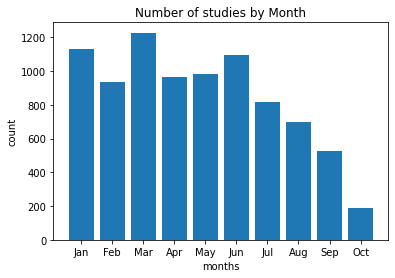

In [0]:
plt.bar(first_column, second_column)
plt.xlabel("months")
plt.ylabel("count")
plt.title('Number of studies by Month')